## Building a Decision Tree to Predict Customer Churn

### imagine you are a data analyst at a telecom company. The marketing department has noticed an increase in customer churn and needs your help to identify which customers are most likely to leave next month.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

warnings.filterwarnings('ignore')


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.22.4)
  from scipy.sparse import csr_matrix, issparse


In [2]:
# Creating a synthetic dataset
# This dataset simulates customer data for a telecom company
data = {
    'CustomerID': range(1, 101),  # Unique ID for each customer
    'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Age of customers
    'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill amount
    'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10  # Churn status
}
df = pd.DataFrame(data)
df

,CustomerID,Age,MonthlyCharge,CustomerServiceCalls,Churn
0,1,20,50,1,No
1,2,25,60,2,No
2,3,30,70,3,Yes
3,4,35,80,4,No
4,5,40,90,0,Yes
...,...,...,...,...,...
95,96,45,100,1,No
96,97,50,110,2,Yes
97,98,55,120,3,Yes
98,99,60,130,4,No


In [3]:
# Splitting the dataset into features and target variable
# Features include age, monthly charge, and customer service calls
# The target variable is churn (Yes or No)
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']]
y = df['Churn']


In [4]:
# Splitting the dataset into training and testing sets
# 70% of the data is used for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Training the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [6]:
# Making predictions on the test set
y_pred = clf.predict(X_test)


In [7]:
# Evaluating the model using accuracy
# Accuracy is the proportion of correct predictions among the total number of cases processed
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 1.0


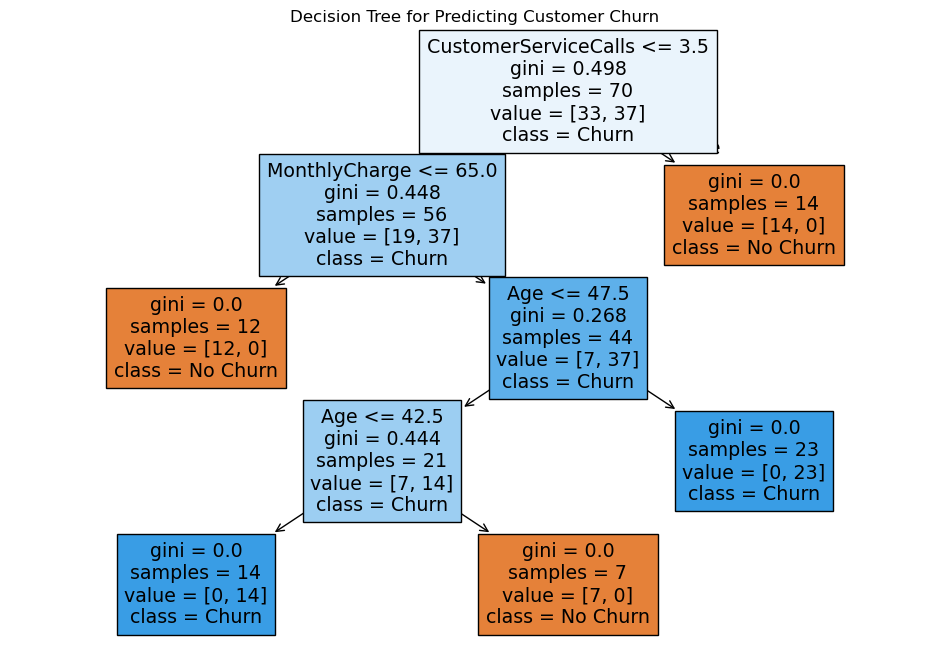

In [9]:
# Visualizing the decision tree
# This visualization helps in understanding how the model makes decisions
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'], class_names=['No Churn', 'Churn'])
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()